<a href="https://colab.research.google.com/github/KDS-Creator/PHY3638_Machine_Learning/blob/main/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity I**: Warmup

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Activity II**: Load data and preprocessing

In [ ]:
# Create dataframe
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
# Extract Input and Output
x = data.iloc[:, [0, 1, 2]].values
y = data.iloc[:, -1:].values

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(50, 3)
(50, 1)


In [9]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40, 3) (10, 3)
(40, 1) (10, 1)


In [10]:
# Normalize input
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
print(X_max.shape, X_min.shape)
print(X_max)
print(X_min)

(1, 3) (1, 3)
[[165349.2  182645.56 471784.1 ]]
[[    0.   51283.14     0.  ]]


In [11]:
X_train_scale = (X_train - X_min) / (X_max - X_min)
print(X_train_scale.min(), X_train_scale.max())

0.0 1.0


In [12]:
X_test_scale = (X_test - X_min) / (X_max - X_min)
print(X_test_scale.min(), X_test_scale.max())

0.0 0.7782360434590044


In [13]:
# Normalize Output
y_mean = y_train.mean(axis=0, keepdims=True)
y_std = y_train.std(axis=0, keepdims=True)

y_train_scale = (y_train - y_mean) / y_std
y_test_scale = (y_test - y_mean) / y_std

print(y_train_scale.max(), y_train_scale.min())
print(y_test_scale.max(), y_test_scale.min())

1.8464513788878065 -2.433579441809424
0.449636647684142 -1.9276315184465596


# **Activity III**: Build and Train Model

In [16]:
def predict(X, w):
  return np.dot(X, w)

In [15]:
def loss(X, y, w):
  y_pred = predict(X, w)
  return np.mean((y_pred - y)**2)

In [17]:
def grad(X, y, w):
  y_pred = predict(X, w)
  delta = y_pred - y
  dw = np.dot(X.T, delta)
  return dw

In [25]:
def gradient_descent(X, y, lr, epoch):
  w = np.zeros((X.shape[1], 1))
  l = []
  for i in range(epoch):
    dw = grad(X, y, w)
    w -= lr*dw
    l.append(loss(X, y, w))
  return w, l

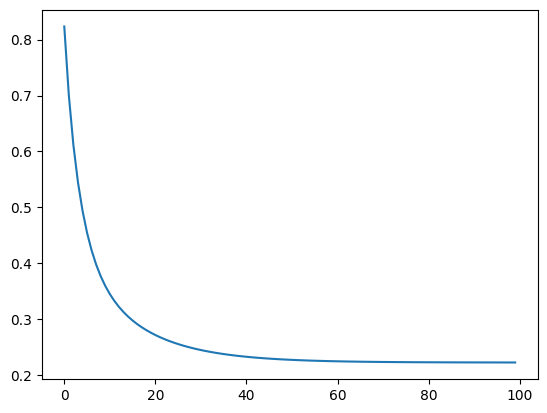

In [26]:
w, l = gradient_descent(X_train_scale, y_train_scale, lr=0.05, epoch=100)
plt.plot(l)

In [27]:
# evaluate Function
def evaluate(y_true, y_pred):
  mse = np.mean((y_pred-y_true)**2)
  rmse = np.sqrt(mse)
  mae = np.mean(np.abs(y_pred-y_true))
  ssr = np.sum((y_true-y_pred)**2)
  sst = np.sum((y_true-np.mean(y_pred))**2)
  r2 = 1 - ssr/sst
  print(f"Mean Square Error : {mse}")
  print(f"Root Mean Square Error : {rmse}")
  print(f"Mean Absolute Error : {mae}")
  print(f"R2 Score : {r2}")

In [28]:
y_pred = predict(X_test_scale, w)
evaluate(y_test_scale, y_pred)

Mean Square Error : 0.5335181875225987
Root Mean Square Error : 0.7304232933871966
Mean Absolute Error : 0.505654741770201
R2 Score : 0.16401467300484374
